### Von Neumann Poker

Von Neumann poker (also called Continous poker) is a simplified model of poker. It is a two-player zero-sum game designed to study strategic decision-making in competitive environments. The game abstracts away many complexities of real poker, focusing instead on the mathematical and strategic aspects of bluffing, betting, and optimal play.

The original game works as follows:
* The game involves only two players, often referred to as the bettor and the caller.
* Players are each dealt a real number uniformly and independently from the interval [0, 1]
* The game consists of a single 'half-street' of betting, where the bettor chooses between checking and betting a fixed amount $s$, but the caller can only call or fold (no raising, and a check by the bettor goes straight to showdown).
* In showdown, the higher hand strength wins.

Von Neumann poker has a solved Nash equilibrium strategy profile discussed here: http://datagenetics.com/blog/december32018/index.html

What if we allow the bettor to choose a bet size $s$? 

A variant where $s$ can be any nonnegative real number is called No-limit Continuous Poker, discussed and solved here (page 154 of "The Mathematics of Poker" by Bill Chen and Jerrod Ankenman): https://www.pokerbooks.lt/books/en/The_Mathematics_of_Poker.pdf

### Limit Continuous Poker

We now consider the variant where $s$ is bounded by an upper limit $U$ and lower limit $L$, referred to as the max and min bets. We will call this variant Limit Continuous Poker.

To fully describe the rules:
* Two players: bettor and caller (or I and II).
* Players are each dealt a real number uniformly and independently from the interval [0, 1]
* A single 'half-street' of betting: the bettor chooses between checking and betting a fixed amount $s \in [L, U]$; if a bet is made, the caller either calls or folds.
* In showdown, the higher hand strength wins.

We attempt to answer the following questions:
* What is the Nash equilibrium strategy profile for Limit Continuous Poker?
* What is the value of the game, and does the bettor have the upper hand still (as in No-limit Continuous Poker)? If so, is there a simple strategic argument for why the bettor must win in expectation?
* As the bounds $L$ and $U$ change, how does the strategy profile change? Does this reflect observed behavior in real poker games with minimum and maximum bet sizes?
* As the bounds $L$ and $U$ approach 0 and $\infty$, respectively, does the strategy profile approach the Nash equilibrium of No-limit Continuous Poker?
* As the bounds $L$ and $U$ approach some fixed value $s$ from either side, does the strategy profile approach the Nash equilibrium of Continuous Poker with fixed bet size $s$?

2
                    1 + 3 L + 2 L                   1 + 2 L                    1
{b0 -> 0, x0 -> ----------------------, x1 -> -------------------, x2 -> -(----------), 
                                     2                   2      3                   2
                4 L (3 + 2 L) (1 + U)         12 L + 20 L  + 8 L           6 L + 4 L
 
                       2                        2      3
          1 + 6 L + 4 L         -1 + 10 L + 20 L  + 8 L
>   x3 -> --------------, x4 -> ------------------------, 
                     2           4 L (1 + L) (3 + 2 L)
            6 L + 4 L
 
                                 2       2               2
          -1 + 3 L (3 + 8 U + 4 U ) + 2 L  (3 + 8 U + 4 U )                 1 - 2 x2
>   x5 -> -------------------------------------------------, bi[s] -> b0 + ----------, 
                                            2                                       2
                       4 L (3 + 2 L) (1 + U)                               4 (1 + s)
 
                                                   2
             1 + 2 s + 2 x2           3 + 8 s + 4 s  + 2 x2
>   ci[s] -> --------------, vi[s] -> ---------------------}
                2 + 2 s                             2
                                           4 (1 + s)
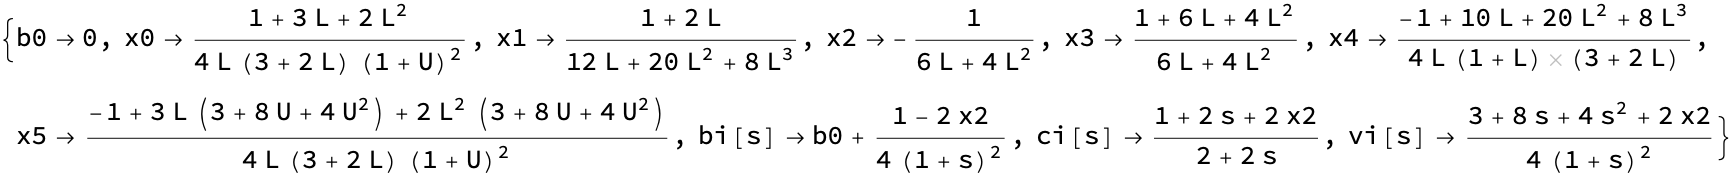

In [29]:
(*---------------LU Limit Continuous Poker----------------------------------------*)

(*Keep the bettor indifferent between bluffing any amount and \
checking at the max bluffing hand strength*)

bluffIndiff = 1/2 ci[s] + (1 - ci[s]) (-1/2-s) == x2;

(*Keep the caller indifferent between calling and folding to a bet \
(between min and max)*)
callIndiff = bi'[s] (1/2 + s) - vi'[s] (-1/2-s) == 0;

(*Keep the caller indifferent between calling and folding to an \
All-in*)
callIndiffMax = x0 (1/2 + U) + (1 - x5) (-1/2-U) == 0;

(*Keep the caller indifferent between calling and folding to a min \
bet*)
callIndiffMin = (x2 - x1) (1/2 + L) + (x4 - x3) (-1/2-L) == 0;

(*The size that the bettor uses for a value bet must maximize EV*)
(*This comes from differentiating the EV of bet return WRT s and \
setting to 0*)
(* EV = x(2s + 1) - s(c(s) + 1) - 1/2 *)
(* dEV/ds = 2x - c(s) - 1 - s*c'(s) = 0 *)
valueOptimality = -s*ci'[s] - ci[s] + 2 vi[s] - 1 == 0;

(*The boundary points of the bluffing function and value function*)
boundaryConditions = {bi[U] == x0, bi[L] == x1, vi[U] == x5, vi[L] == x4};

(*Keep the bettor indifferent between checking and making a min value \
bet with the most marginal value betting hand*)
valueIndiff = 1/2 ci[L] + (1/2 + L) (x3 - ci[L]) + (1 - x3) (-1/2-L) == x3;

(*Solve for c(s) first*)
Csol = Solve[{bluffIndiff}, {ci[s]}][[1]];
(*
Use c(s) to solve for v(s)*)

Vsol = Solve[{valueOptimality /. {ci'[s] -> D[ci[s] /. Csol, s]} /. 
      Csol}, {vi[s]}][[1]];

(*Use v(s) to solve for b(s),getting an extra constant of integration \
C1*)
Bsol = 
  DSolve[{callIndiff /. {vi'[s] -> D[vi[s] /. Vsol /. Csol, s]}}, bi[s], 
    s, GeneratedParameters -> (b0 &)][[1]];

Union[{callIndiffMax, callIndiffMin, valueIndiff}, 
     boundaryConditions] /. {bi[s_] -> bi[s] /. Bsol} /. {vi[s_] -> 
      vi[s] /. Vsol} /. {ci[s_] -> ci[s] /. Csol};

(*Use v(s),c(s),and b(s) with all our equations to solve for all the \
scalars*)
Xsol = 
  Solve[Union[{callIndiffMax, callIndiffMin, valueIndiff}, 
         boundaryConditions] /. {bi[s_] -> bi[s] /. Bsol} /. {vi[s_] -> 
          vi[s] /. Vsol} /. {ci[s_] -> ci[s] /. Csol}, {x0, x1, x2, x3, 
      x4, x5, b0}][[1]] // Simplify;

(*Plug the scalars back into the function solutions*)
LimitSol = 
 Union[Vsol, Csol, Bsol, Xsol] // Simplify

In [35]:
(*define the final functions b,c,and v*)
b[s_] := Evaluate[(bi[s] /. LimitSol)]
c[s_] := Evaluate[(ci[s] /. LimitSol)]
v[s_] := Evaluate[(vi[s] /. LimitSol)]
vinv[x_] := -1 - Sqrt[(4 x - 4) (-2 + 2 x2)]/(4 x - 4)
TeXForm[vinv[x]]

-\frac{\sqrt{(4 x-4) (2 \text{x2}-2)}}{4 x-4}-1

In [36]:
(*-------------analysis of payoff--------------*)

cInv[y_] := (x2 - y)/(y - 1);
intBExpr = Integrate[b[s1], s1] // FullSimplify;
intB[s_] := intBExpr /. s1 -> s
intVExpr = Integrate[v[s1], s1] // FullSimplify;
intV[s_] := intVExpr /. s1 -> s
intVinvExpr = Integrate[vinv[xt], xt] // FullSimplify;
intVinv[x_] := intVinvExpr /. xt -> x

bth := x2;
vth := x3;

assumptions = {
   0 < b[U] < b[L] < x2 < x3 < v[L] < v[U] < 1,
   U > L > 0,
   1 > c[U] > c[L]
   };

(* utility functions to compute the expected value of a region *)

loseShowdownPayoff[sIntegral_, area_] := -sIntegral - 0.5*area;
winShowdownPayoff[sIntegral_, area_] := sIntegral + 0.5*area;
loseAntePayoff[sIntegral_, area_] := -0.5*area;
winAntePayoff[sIntegral_, area_] := 0.5*area;

InverseIntegrate[f_, s_, {a_, b_}] := 
 Assuming[
  assumptions, -Integrate[f, {s, a, b}] + b*f /. s -> b - a*f /. 
   s -> a]

ComputeArea[xMinOfY_, xMaxOfY_, yMin_, yMax_] := 
 Assuming[assumptions, 
  Integrate[(xMaxOfY[y] - xMinOfY[y]), {y, yMin, yMax}]
  ]

ConstantRegion[xMinOfY_, xMaxOfY_, yMin_, yMax_, s_, payoffFunc_] := 
 Module[{area},
  area = ComputeArea[xMinOfY, xMaxOfY, yMin, yMax];
  payoffFunc[s*area, area]
  ]

VariableRegionVinv[xMinOfY_, xMaxOfY_, yMin_, yMax_, payoffFunc_] := 
 Module[{area},
  area = ComputeArea[xMinOfY, xMaxOfY, yMin, yMax];
  sInt = Assuming[assumptions, 
    Integrate[intVinv[xMaxOfY[y]] - intVinv[xMinOfY[y]],
      {y, yMin, yMax}
     ]
     ];
  payoffFunc[sInt, area]
  ]

InverseRegionB[sLeftOfY_, sRightOfY_, yMin_, yMax_, payoffFunc_] := 
 Module[{xMinOfY, xMaxOfY, area, sInt},
  xMinOfY[y_] := b[sLeftOfY[y]];
  xMaxOfY[y_] := b[sRightOfY[y]];
  area = ComputeArea[xMinOfY, xMaxOfY, yMin, yMax];
  sInt = 
   Assuming[assumptions, 
    Integrate [-intB[sRightOfY[y]] + intB[sLeftOfY[y]] + 
      sRightOfY[y]*xMaxOfY[y] - sLeftOfY[y]*xMinOfY[y], {y, yMin, 
      yMax}]];
  payoffFunc[sInt, area]
  ]

InverseRegionV[sLeftOfY_, sRightOfY_, yMin_, yMax_, payoffFunc_] := 
 Module[{xMinOfY, xMaxOfY, area, sInt},
  xMinOfY[y_] := v[sLeftOfY[y]];
  xMaxOfY[y_] := v[sRightOfY[y]];
  area = ComputeArea[xMinOfY, xMaxOfY, yMin, yMax];
  sInt = 
   Assuming[assumptions, 
    Integrate[-intV[sRightOfY[y]] + intV[sLeftOfY[y]] + 
      sRightOfY[y]*xMaxOfY[y] - sLeftOfY[y]*xMinOfY[y], {y, yMin, 
      yMax}]];
  payoffFunc[sInt, area]
  ]

In [55]:
(* define all regions of the partitioned square and find their payoffs *)

r0 := ConstantRegion[Function[y, 0], Function[y, b[U]], c[U], 1, U, 
   loseShowdownPayoff];
r1 := InverseRegionB[Function[y, U], Function[y, L], c[U], 1, 
   loseShowdownPayoff];
r2 := InverseRegionB[Function[y, cInv[y]], Function[y, L], c[L], c[U],
    loseShowdownPayoff];
r3 := ConstantRegion[Function[y, b[L]], Function[y, bth], c[L], 1, L, 
   loseShowdownPayoff];
r4 := ConstantRegion[Function[y, 0], Function[y, b[U]], c[L], c[U], 0,
    winAntePayoff];
r5 := ConstantRegion[Function[y, b[U]], Function[y, b[cInv[y]]], c[L],
    c[U], 0, winAntePayoff];
r6 := ConstantRegion[Function[y, 0], Function[y, bth], 0, c[L], 0, 
   winAntePayoff];
r7 := ConstantRegion[Function[y, bth], Function[y, vth], vth, 1, 0, 
   loseAntePayoff];
(*r8:=ConstantRegion[Function[y,bth],Function[y,y],bth,vth,0,\
loseAntePayoff];
r9:=ConstantRegion[Function[y,y],Function[y,vth],bth,vth,0,\
winAntePayoff];*)
r10 := ConstantRegion[Function[y, bth], Function[y, vth], 0, bth, 0, 
   winAntePayoff];
r11 := ConstantRegion[Function[y, vth], Function[y, v[L]], v[L], 1, L,
    loseShowdownPayoff];
(*r12:=ConstantRegion[Function[y,vth],Function[y,y],vth,v[L],L,\
loseShowdownPayoff];*)
r13 := VariableRegionVinv[Function[y, v[L]], Function[y, v[U]], v[U], 
   1, loseShowdownPayoff];
r14 := VariableRegionVinv[Function[y, v[L]], Function[y, y], v[L], 
   v[U], loseShowdownPayoff];
(*r15:=ConstantRegion[Function[y,v[U]],Function[y,y],v[U],1,U,\
loseShowdownPayoff];*)
(*r16:=ConstantRegion[Function[y,y],Function[y,v[L]],vth,v[L],L,\
winShowdownPayoff];*)
r17 := ConstantRegion[Function[y, vth], Function[y, v[L]], c[L], vth, 
   L, winShowdownPayoff];
r18 := VariableRegionVinv[Function[y, y], Function[y, v[U]], v[L], 
   v[U], winShowdownPayoff];
r19 := InverseRegionV[Function[y, L], Function[y, U], c[U], v[L], 
   winShowdownPayoff];
r20 := InverseRegionV[Function[y, L], Function[y, cInv[y]], c[L], 
   c[U], winShowdownPayoff];
(*r21:=ConstantRegion[Function[y,y],Function[y,1],v[U],1,U,\
winShowdownPayoff];*)
r22 := ConstantRegion[Function[y, v[U]], Function[y, 1], c[U], v[U], 
   U, winShowdownPayoff];
r23 := ConstantRegion[Function[y, v[cInv[y]]], Function[y, 1], c[L], 
   c[U], 0, winAntePayoff];
r24 := ConstantRegion[Function[y, vth], Function[y, 1], 0, c[L], 0, 
   winAntePayoff];


In [80]:
(* ClearAll[regions]
regions = {r0, r1, r2, r3, r4, r5, r6, r7, r10, r11, r13, r14, r17, 
   r18, r19, r20, r22, r23, r24};

(*Step 2:Simplify each term,keeping everything exact*)
simplifiedTerms = Table[
   Print["Simplifying r", i];
   Simplify[regions[[i]], assumptions] // 
    Rationalize,(*You can also try Together or Simplify*)
   {i, 
    Length[regions]}];

(*Step 3:Incremental exact summation with monitoring*)
Print["Incremental summation..."];
partialSum = simplifiedTerms[[1]];

Do[
  Print["Adding term ", i];
  partialSum = 
   Simplify[partialSum + simplifiedTerms[[i]], assumptions];
  (*Print["ByteCount: ",ByteCount[
  partialSum]];*)
  , {i, 2, Length[simplifiedTerms]}
  ]; *)

In [81]:
(* finalValue=FullSimplify[partialSum/.LimitSol, assumptions] *)

In [63]:
VLCP[L_, U_] := ((1 + L)^3 (1 + U)^3 - ((1 + L)^3 + L^3 (1 + U)^3))/
         (14 (1 + L)^3 (1 + U)^3 - 2 ((1 + L)^3 + L^3 (1 + U)^3))

(* target - finalValue // Simplify *)

2 (A_)
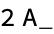

3
                         L
-(-------------------------------------------------) + 
            3        3             3    3        3
  14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                           3 U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                          9 L U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                            2
                         9 L  U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                             2
                          3 U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                              2
                         9 L U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                            2  2
                         9 L  U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                            3
                           U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                              3
                         3 L U
>   ------------------------------------------------- + 
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
 
                            2  3
                         3 L  U
>   -------------------------------------------------
              3        3             3    3        3
    14 (1 + L)  (1 + U)  - 2 ((1 + L)  + L  (1 + U) )
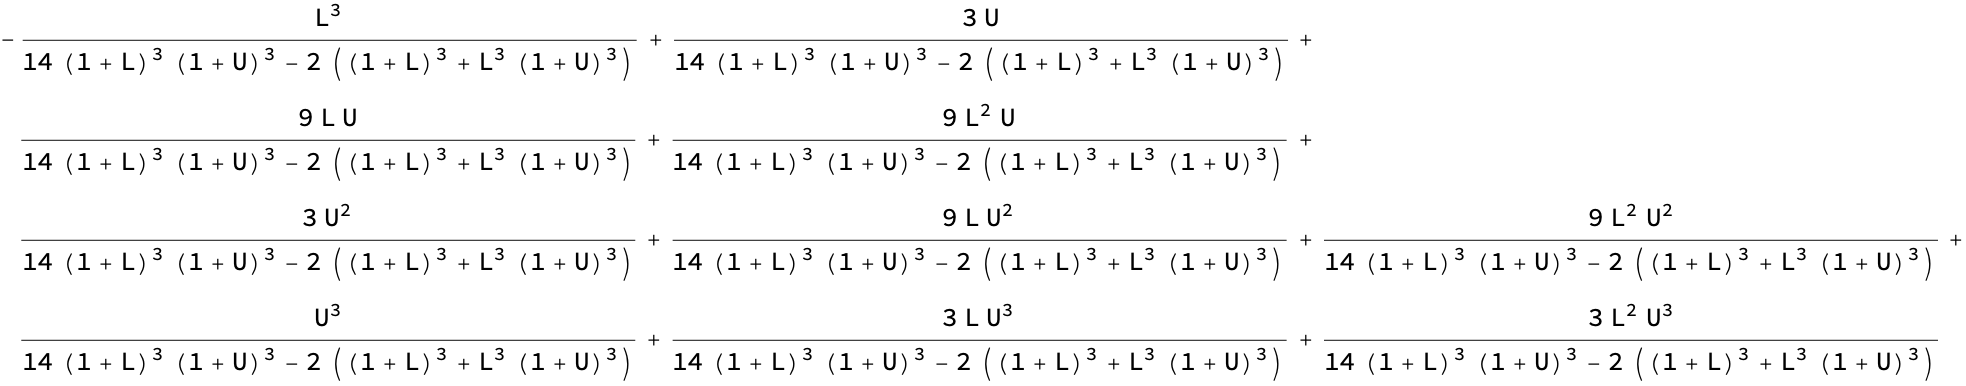

In [77]:
VLCP[L, U]//Expand

2        2        6
(-9 L  (1 + L)  (1 + U) ) / 
 
                         2      3    3                 2      3
>   Power[6 + 21 U + 21 U  + 7 U  + L  (5 + 18 U + 18 U  + 6 U ) + 
 
                          2      3       2                 2      3
>     3 L (6 + 21 U + 21 U  + 7 U ) + 3 L  (6 + 21 U + 21 U  + 7 U ), 2]
          6        2
(9 (1 + L)  (1 + U) ) / 
 
                         2      3    3                 2      3
>   Power[6 + 21 U + 21 U  + 7 U  + L  (5 + 18 U + 18 U  + 6 U ) + 
 
                          2      3       2                 2      3
>     3 L (6 + 21 U + 21 U  + 7 U ) + 3 L  (6 + 21 U + 21 U  + 7 U ), 2]
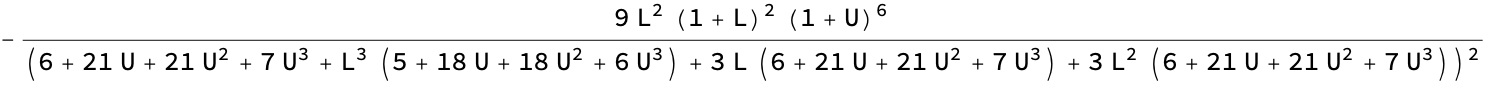
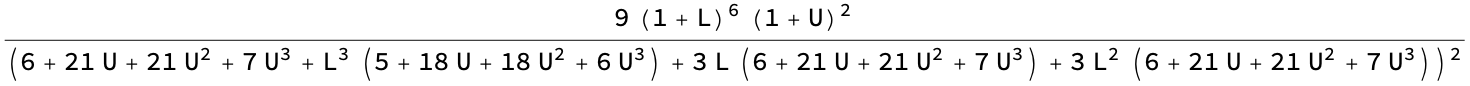

In [74]:
D[VLCP[L, U], L] //Simplify
D[VLCP[L, U], U] //Simplify

In [81]:
TeXForm[VLCP[L, U]/. L -> 0]

\frac{(U+1)^3-1}{14 (U+1)^3-2}

1
--
14
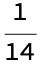

In [79]:
Limit[Limit[VLCP[L, U], L -> 0], U->Infinity] //Simplify

In [ ]:
(* compute value by vertical strips *)
bluffPayoff[x_] := x2 - 1/2
checkPayoff[x_] := x - 1/2
minBetPayoff[x_] := x(2L + 1) - L(c[L] + 1) - 1/2
maxBetPayoff[x_] := x(2U + 1) - U(c[U] + 1) - 1/2
intermediateBetPayoff[x_] := x(2vinv[x] + 1) - vinv[x](c[vinv[x]] + 1) - 1/2

totalBluffPayoff = Assuming[assumptions, Integrate[bluffPayoff[x], {x, 0, x2}]] 
totalCheckPayoff = Assuming[assumptions, Integrate[checkPayoff[x], {x, x2, x3}]] 
totalMinBetPayoff = Assuming[assumptions, Integrate[minBetPayoff[x], {x, x3, v[L]}]] 
totalIntermediateBetPayoff = Assuming[assumptions, Integrate[intermediateBetPayoff[x], {x, v[L], v[U]}]] 
totalMaxBetPayoff = Assuming[assumptions, Integrate[maxBetPayoff[x], {x, v[U], 1}]] 

totalPayoff = Assuming[assumptions, totalBluffPayoff + totalCheckPayoff + totalMinBetPayoff + totalMaxBetPayoff + totalIntermediateBetPayoff]

stripResult=FullSimplify[Simplify[totalPayoff, assumptions] /. LimitSol, assumptions];

stripResult - VLCP[L, U] // FullSimplify

In [ ]:
D[x2/.LimitSol, U]//Simplify
(* (1-x2)/(vinv[x] + 1)^2 * 1/(4-4x) + 1 *)
 

In [ ]:
dvinvdU=D[vinv[x], x2]//Simplify;

vinv[x]
(1-x2)/(vinv[x]+1)^2 // Simplify
(* TeXForm[dvinvdU] *)
(* this is always negative, so the bet size of intermediate bets is decreasing in U *)
(* 
cvinv[x]:=c[vinv[x]]/.LimitSol
dcdU=D[cvinv[x], U]//Simplify
(* this is always positive, so the call cutoff is increasing in U *)

dEVdU = Assuming[{1/2<x<1, U>0, L>0}, Simplify[dvinvdU * (-dcdU-c[vinv[x]]+2x-1) /. x-> v[U] /.LimitSol]]
 *)

(* Use Reduce with assumptions *)
(* Reduce[1/2<x<1 && 0< U && dEVdU > 0, {x, U}, Reals] *)

(* Plot[dEVdU/.x->0.999, {U, 0, 10}] *)


In [ ]:
x5/.LimitSol

In [ ]:
EVU = 1/2 c + (x - c) (U + 1/2) + (1 - x) (-U - 1/2);
(* dEVU = D[EVU/.LimitSol, U]//Simplify
Plot[dEVU/.x->0.999/.L->0, {U, 0, 10}] *)
D[EVU, c]
D[c[s], x2]
D[x2/.LimitSol, U]
D[c[s], s]//Simplify
D[EVU, U]
expand = D[EVU, c] (D[c[s], x2] dx2du + D[c[s], s]) + D[EVU, U];
res = expand/.{c->c[U], s->U}//Simplify;

res2 = res/.dx2du->D[x2/.LimitSol, U] /. LimitSol // Simplify


(* Resolve[ForAll[{x, U, L}, 
  ((x5 /. LimitSol) < x < 1 && U > L && L > 0) \[Implies] (res2 > 0)
], Reals] *)




In [ ]:
D[x2/.LimitSol, U]//Simplify
(* (1-x2)/(vinv[x] + 1)^2 * 1/(4-4x) + 1 *)
 

In [ ]:
D[x2/.LimitSol, U]//Simplify
(* (1-x2)/(vinv[x] + 1)^2 * 1/(4-4x) + 1 *)
 